## Exercise 3 ##
Generate a training dataset containing 30 observations with two predictors centered around -0.5
and 0.5 with a cluster standard deviation of 0.4 and one qualitative response variable. Define
classes that takes ‘Red’ when response variable is positive and ‘Blue’ otherwise. Use this generated
dataset to make a prediction for y when X1 = X2 = 0.25 using K-nearest neighbours.
- a) Compute the Euclidean distance between each observations and the test points.
- b) What is the class prediction with K = 1?
- c) What is the class prediction with K = 5?
- d) Plot the classification points with decision boundary for K = 5.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
# Import plotting library
1
import matplotlib.pyplot as plt
# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
X, y = make_blobs(n_samples=30, centers=[[0.5,0.5], [-0.5,-0.5]], cluster_std=0.4, random_state=110)

In [3]:
X

array([[-0.62128197, -0.33119071],
       [ 0.41054502, -0.55243845],
       [-0.04683763, -0.63282058],
       [-0.45583167, -0.82678408],
       [-0.08705405,  1.21760355],
       [-0.13559683, -0.50771639],
       [ 0.51874678,  0.34923131],
       [ 1.06124953, -0.1191171 ],
       [-0.22516009, -0.03593629],
       [ 0.15267209,  0.51086375],
       [-0.45326829,  0.27421144],
       [ 0.63143884,  0.18152058],
       [-0.51303224, -0.10738009],
       [ 0.59720065,  1.13122092],
       [-0.16456221,  0.47640876],
       [ 0.43486392,  0.20203285],
       [-0.41517874, -0.43718134],
       [ 0.96669212,  0.95908906],
       [-0.77045194, -0.55916309],
       [-0.931161  , -0.32445296],
       [-0.10749569,  0.17377543],
       [-0.45811525, -0.69272339],
       [ 0.92771992,  0.20611434],
       [-0.67349665, -0.20321676],
       [-0.75942315, -0.80653547],
       [ 0.12609664, -0.79536846],
       [ 0.55204373,  0.67256894],
       [-0.77402001, -0.27478221],
       [ 1.12651223,

In [26]:
df = pd.DataFrame({'X1': X[:,0],'X2': X[:,1],'Y': y})
# specify classes
df['Class'] = df['Y'].apply(lambda x: 'Red' if x>0 else 'Blue')

In [27]:
df.head()

,X1,X2,Y,Class
0,-0.621282,-0.331191,1,Red
1,0.410545,-0.552438,0,Blue
2,-0.046838,-0.632821,1,Red
3,-0.455832,-0.826784,1,Red
4,-0.087054,1.217604,0,Blue


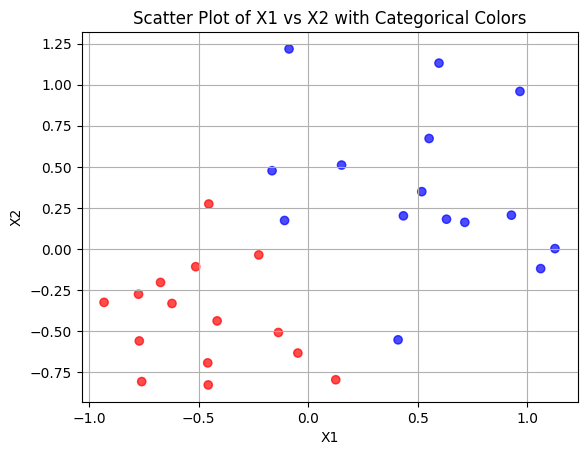

In [37]:
# Define color mapping
color_mapping = {'Red': 'red', 'Blue': 'blue'}
colors = df['Class'].map(color_mapping)  # Convert labels to actual color names

plt.scatter(df['X1'], df['X2'], c=colors, alpha=0.7)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of X1 vs X2 with Categorical Colors')
plt.grid(True)
plt.show()

### a) Compute the Euclidean distance between each observations and the test points. ###

In [29]:
df['Euclidean'] = np.sqrt((df['X1']-0.25)**2+(df['X2']-0.25)**2)

In [30]:
df.head()

,X1,X2,Y,Class,Euclidean
0,-0.621282,-0.331191,1,Red,1.047337
1,0.410545,-0.552438,0,Blue,0.818341
2,-0.046838,-0.632821,1,Red,0.931389
3,-0.455832,-0.826784,1,Red,1.287502
4,-0.087054,1.217604,0,Blue,1.024628


### b) What is the class prediction with K = 1? ###

In [31]:
df.nsmallest(1,'Euclidean')

,X1,X2,Y,Class,Euclidean
15,0.434864,0.202033,0,Blue,0.190986


In [32]:
df['Euclidean'].min()

np.float64(0.1909856478959581)

### c) What is the class prediction with K = 5? ###

In [36]:
df.nsmallest(5,'Euclidean')

,X1,X2,Y,Class,Euclidean
15,0.434864,0.202033,0,Blue,0.190986
9,0.152672,0.510864,0,Blue,0.278429
6,0.518747,0.349231,0,Blue,0.286482
20,-0.107496,0.173775,0,Blue,0.365532
11,0.631439,0.181521,0,Blue,0.387537


It seems that (0.25, 0.25) should be blue.

### d) Draw decision doundary with K=5. ###

In [34]:
def plot_boundary(x, y, k):
    # Instantiate the model object
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fits the model
    knn.fit(x, y)
    
    # Step size of the mesh
    h = .02
    
    # Plot the decision boundary.
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    
    # Create Meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict labels for each point in mesh
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Reshape to match dimensions
    Z = Z.reshape(xx.shape)
    
    # Plotting
    plt.contour(xx, yy, Z, cmap=plt.cm.bwr, linestyles = 'dashed', linewidths=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.title(f'KNN Decision Boundary with {k} Nearest Neighbours')
    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$', rotation='horizontal')
    plt.show()

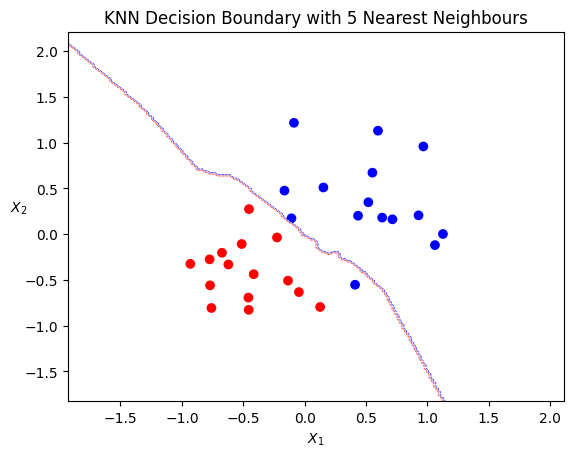

In [35]:
# Plot KNN decision boundary with K=5
plot_boundary(X, y, 5)

## Exercise 4 ## 
For this exercise, use the admission dataset. The dataset contains three predictor variables: gre,
gpa and rank and one binary response variable called admit.
- a) List all tunable hyperparameters.
- b) Select the best model by searching over a range of hyperparameters based on cross validation
score using an Exhaustive Search.

In [39]:
# Import Library
import io
import requests
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score

In [63]:
df = pd.read_csv('./data/binary.csv')

In [64]:
df.head(10)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


In [65]:
features = df.drop('admit', axis=1)
target = df['admit']

In [67]:
# convert to arrays
X = features.values
y = target.values

In [68]:
X

array([[380.  ,   3.61,   3.  ],
       [660.  ,   3.67,   3.  ],
       [800.  ,   4.  ,   1.  ],
       ...,
       [460.  ,   2.63,   2.  ],
       [700.  ,   3.65,   2.  ],
       [600.  ,   3.89,   3.  ]], shape=(400, 3))

In [69]:
# Scale and fit the model
pipe = Pipeline([("scaler", StandardScaler()),("logistic", LogisticRegression(solver='liblinear'))])
pipe.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(solver='liblinear'))])

In [71]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('logistic', LogisticRegression(solver='liblinear'))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(solver='liblinear'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'deprecated',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'liblinear',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [72]:
# penalty hyperparamter values
penalty = ['l1', 'l2']
# regularization hyperparamter
C = np.linspace(0.01,10,10)
# subsume into one dict
param_grid = dict(logistic__C=C, logistic__penalty=penalty)

In [73]:
C

array([ 0.01,  1.12,  2.23,  3.34,  4.45,  5.56,  6.67,  7.78,  8.89,
       10.  ])

In [74]:
param_grid

{'logistic__C': array([ 0.01,  1.12,  2.23,  3.34,  4.45,  5.56,  6.67,  7.78,  8.89,
        10.  ]),
 'logistic__penalty': ['l1', 'l2']}

In [75]:
# create a grid search with cv=5
gridsearch = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, verbose=1)
# fit grid search
best_model = gridsearch.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [76]:
# best model parameters
best_model.best_params_

{'logistic__C': np.float64(2.23), 'logistic__penalty': 'l2'}

In [77]:
# best score
best_model.best_score_

np.float64(0.7075000000000001)

In [78]:
pipe['logistic'].coef_

array([[ 0.26139396,  0.29067213, -0.51864053]])

In [79]:
best_model.best_estimator_.named_steps

{'scaler': StandardScaler(),
 'logistic': LogisticRegression(C=np.float64(2.23), solver='liblinear')}

In [80]:
best_model.best_estimator_.named_steps['logistic'].coef_

array([[ 0.26317473,  0.29320696, -0.52387746]])

In [81]:
best_model.best_estimator_.named_steps['logistic'].intercept_

array([-0.85285979])

In [82]:
# best model params after hypertuning
best_model.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('scaler', StandardScaler()),
  ('logistic', LogisticRegression(solver='liblinear'))],
 'estimator__transform_input': None,
 'estimator__verbose': False,
 'estimator__scaler': StandardScaler(),
 'estimator__logistic': LogisticRegression(solver='liblinear'),
 'estimator__scaler__copy': True,
 'estimator__scaler__with_mean': True,
 'estimator__scaler__with_std': True,
 'estimator__logistic__C': 1.0,
 'estimator__logistic__class_weight': None,
 'estimator__logistic__dual': False,
 'estimator__logistic__fit_intercept': True,
 'estimator__logistic__intercept_scaling': 1,
 'estimator__logistic__l1_ratio': None,
 'estimator__logistic__max_iter': 100,
 'estimator__logistic__multi_class': 'deprecated',
 'estimator__logistic__n_jobs': None,
 'estimator__logistic__penalty': 'l2',
 'estimator__logistic__random_state': None,
 'estimator__logistic__solver': 'liblinear',
 'estimator__logistic__tol': 0.0001,
 'estimator__

In [83]:
# cross validation results
df1 = pd.DataFrame(best_model.cv_results_)
df1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002036,0.000276,0.000991,0.000154,0.01,l1,"{'logistic__C': 0.01, 'logistic__penalty': 'l1'}",0.6875,0.6875,0.6875,0.6750,0.6750,0.6825,0.006124,20
1,0.001814,0.000385,0.000869,0.000116,0.01,l2,"{'logistic__C': 0.01, 'logistic__penalty': 'l2'}",0.7125,0.7500,0.7000,0.6875,0.6875,0.7075,0.023184,14
2,0.001599,0.000211,0.000685,0.000138,1.12,l1,"{'logistic__C': 1.12, 'logistic__penalty': 'l1'}",0.7125,0.7375,0.7000,0.6875,0.6875,0.7050,0.018708,16
3,0.001772,0.000247,0.000715,0.000080,1.12,l2,"{'logistic__C': 1.12, 'logistic__penalty': 'l2'}",0.7125,0.7375,0.7000,0.6875,0.6875,0.7050,0.018708,16
4,0.001971,0.000445,0.001181,0.000542,2.23,l1,"{'logistic__C': 2.23, 'logistic__penalty': 'l1'}",0.7125,0.7500,0.7000,0.6875,0.6875,0.7075,0.023184,14
5,0.001874,0.000379,0.000849,0.000207,2.23,l2,"{'logistic__C': 2.23, 'logistic__penalty': 'l2'}",0.7125,0.7375,0.7000,0.6875,0.7000,0.7075,0.016956,1
6,0.001553,0.000207,0.000671,0.000092,3.34,l1,"{'logistic__C': 3.34, 'logistic__penalty': 'l1'}",0.7125,0.7375,0.7000,0.6875,0.6875,0.7050,0.018708,16
7,0.001468,0.000303,0.000578,0.000059,3.34,l2,"{'logistic__C': 3.34, 'logistic__penalty': 'l2'}",0.7125,0.7375,0.7000,0.6875,0.7000,0.7075,0.016956,1
8,0.001607,0.000312,0.000582,0.000042,4.45,l1,"{'logistic__C': 4.45, 'logistic__penalty': 'l1'}",0.7125,0.7375,0.7000,0.6875,0.6875,0.7050,0.018708,16
9,0.001321,0.000265,0.000700,0.000212,4.45,l2,"{'logistic__C': 4.45, 'logistic__penalty': 'l2'}",0.7125,0.7375,0.7000,0.6875,0.7000,0.7075,0.016956,1


In [84]:
# Model Params
print(f"Best Penalty: {best_model.best_params_['logistic__penalty']}")
print(f"Best C: {best_model.best_params_['logistic__C']}")
print(f"Best Score: {best_model.best_score_:.04}")

Best Penalty: l2
Best C: 2.23
Best Score: 0.7075


## SVM practices

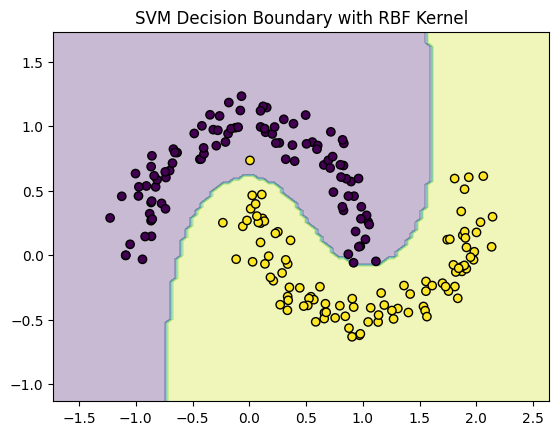

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons

# Generate non-linearly separable data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Train SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X, y)

# Plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title('SVM Decision Boundary with RBF Kernel')
    plt.show()

plot_decision_boundary(svm_rbf, X, y)